In [1]:
import re
import pandas as pd
import numpy as np
from ssvep_analyzer import SsvepAnalyzer

In [2]:
file_path = '../Data/2023-12-03/Marco_Deuteranomaly_0.0_mixed-deuteranomaly-series_frequency_16.5_tile-size144_90993c02-de06-4745-8fb8-c4ecbeaebe08.csv'
df = pd.read_csv(file_path, skiprows=10, header=None)

with open(file_path, 'r') as file:
    content = file.read()
    
match = re.search(r'Frequency:\s*(\d+(\.\d+)?)', content)
stimulus_frequency = float(match.group(1)) if match else None

eeg_data = df.to_numpy()[:, 1:9].astype(float)
marker = df.to_numpy()[:, -1].flatten()

analyzer = SsvepAnalyzer(sampling_rate=250, stimulus_frequency=stimulus_frequency)

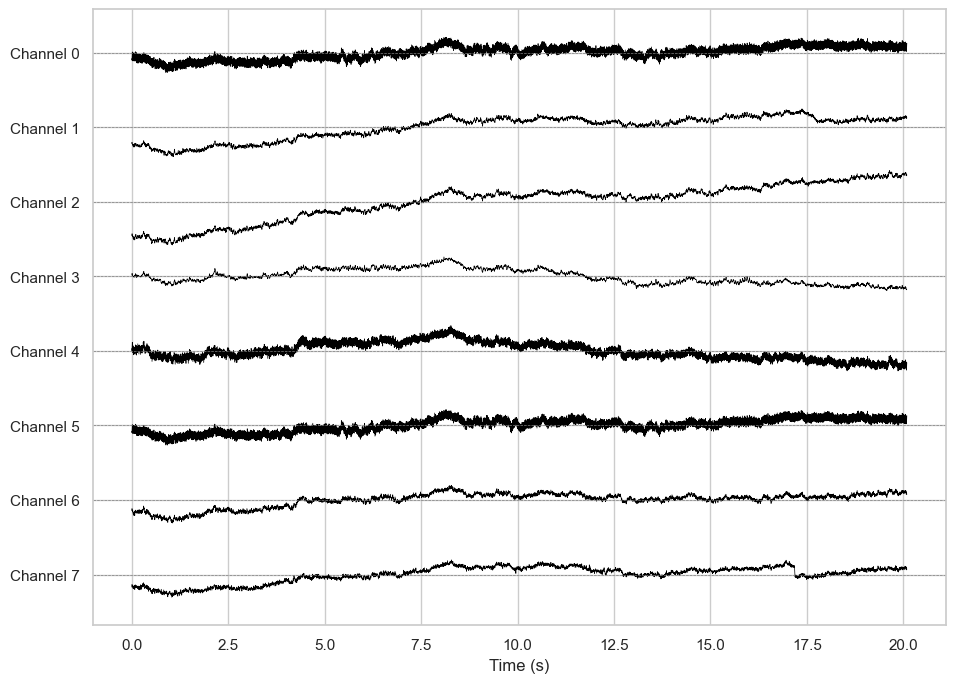

In [3]:
analyzer.plot_eeg(eeg_data);

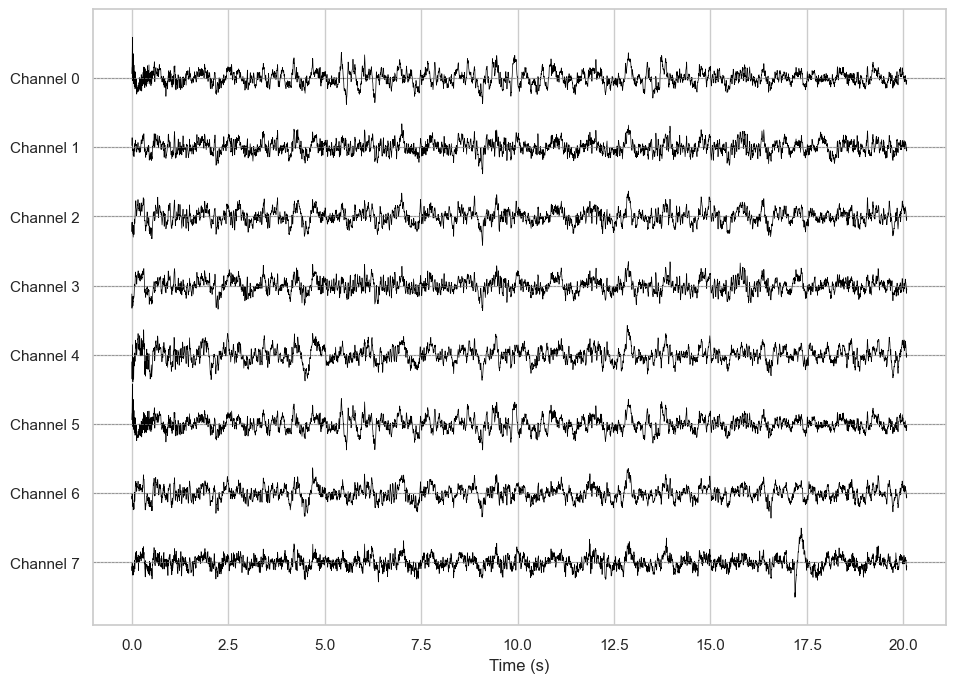

In [4]:
processed_eeg_data = analyzer.apply_linear_detrending(eeg_data)
processed_eeg_data = analyzer.apply_lowpass_filter(processed_eeg_data)
processed_eeg_data = analyzer.apply_highpass_filter(processed_eeg_data)
processed_eeg_data = analyzer.apply_notch_filter(processed_eeg_data)

analyzer.plot_eeg(processed_eeg_data);

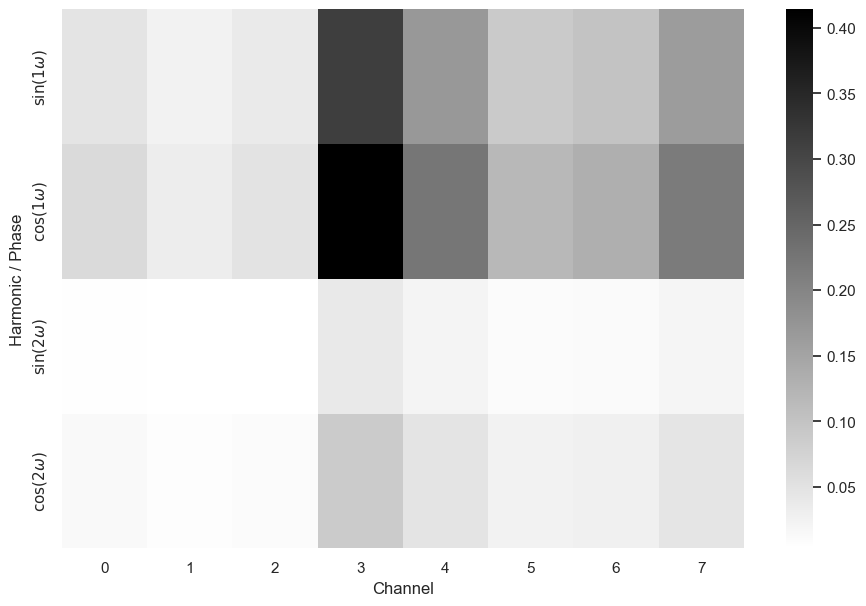

In [5]:
reduced_eeg_data, coefficient_matrix = analyzer.compute_reduced_signal(processed_eeg_data)
analyzer.plot_coefficient_matrix(np.abs(coefficient_matrix));

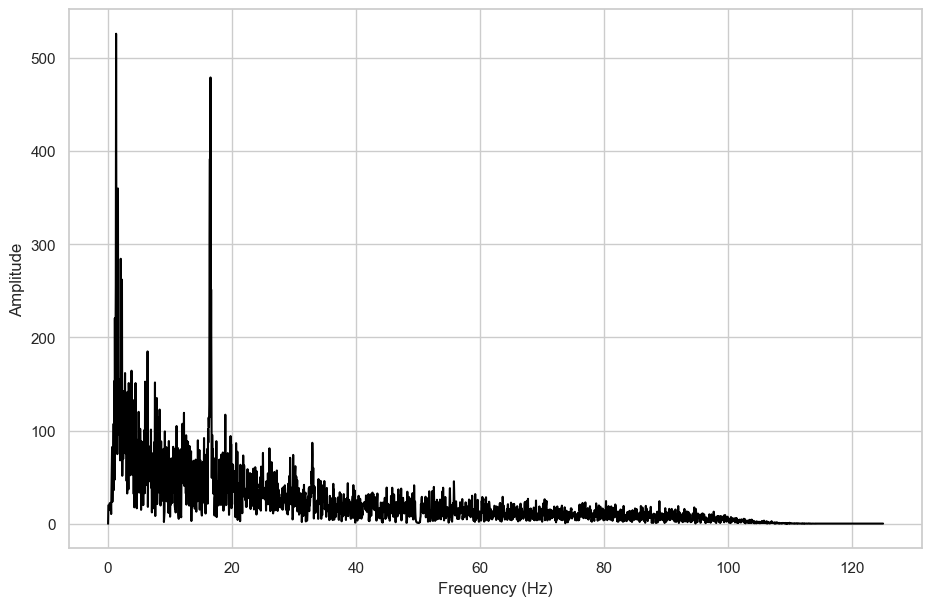

In [6]:
frequencies, spectrum = analyzer.compute_power_spectrum(reduced_eeg_data)
analyzer.plot_power_spectrum(frequencies, spectrum);

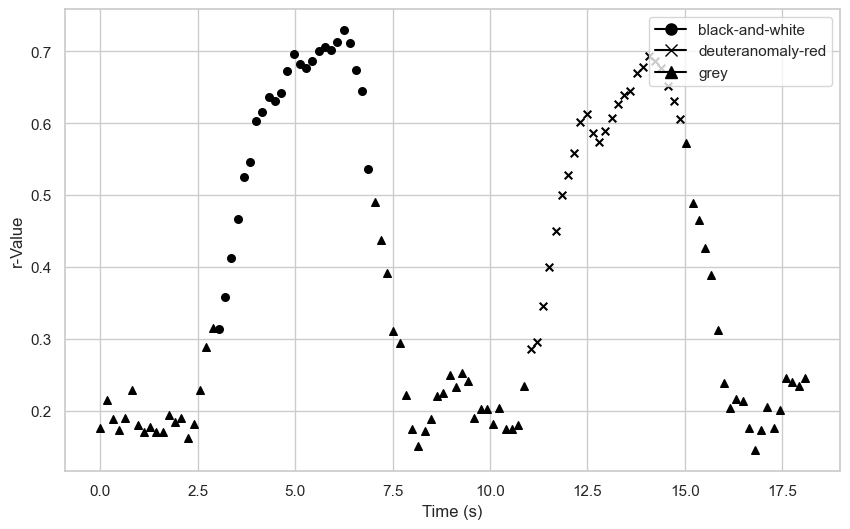

In [7]:
r_values, times, marker_values = analyzer.compute_running_r_values(processed_eeg_data, marker)
analyzer.plot_r_values(r_values, times, marker_values);

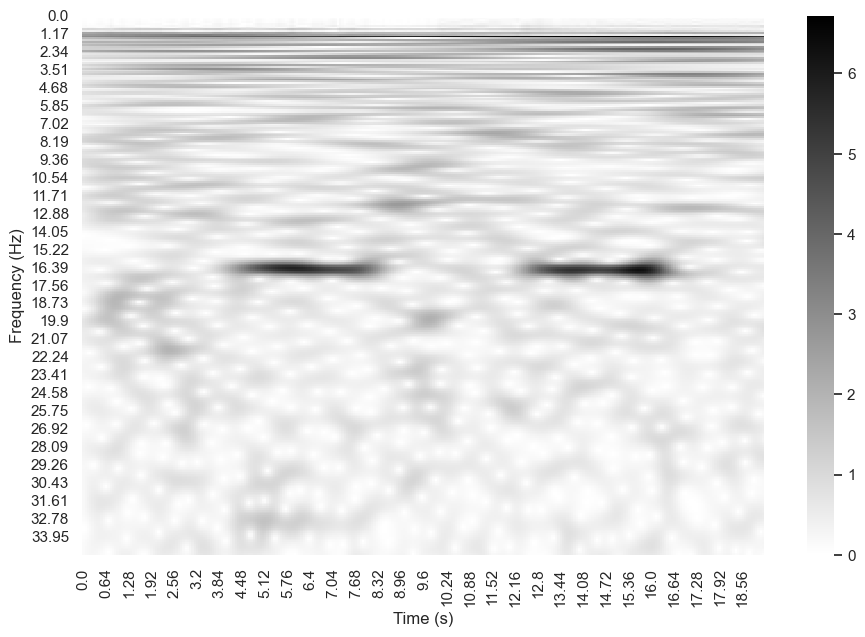

In [8]:
frequencies, times, cwt_matrix = analyzer.compute_wavelet_transform(reduced_eeg_data)
analyzer.plot_wavelet_transform(frequencies, times, np.abs(cwt_matrix));

In [19]:
import random
from math import ceil

n_numbers = 30
n_bins = 5
x_range = (0, 1)

bin_width = (x_range[1] - x_range[0]) / n_bins
bin_arr = list(range(n_bins)) * ceil(n_numbers / n_bins)
random.shuffle(bin_arr)
numbers = [np.round(random.uniform(bin_width * i, bin_width * (i + 1)), 2) for i in bin_arr[:n_numbers]]
numbers

[0.51,
 0.08,
 0.78,
 0.28,
 0.84,
 0.15,
 0.33,
 0.19,
 0.29,
 0.97,
 0.52,
 0.79,
 0.83,
 0.75,
 0.69,
 0.45,
 0.34,
 0.41,
 0.95,
 0.02,
 0.83,
 0.11,
 0.59,
 0.56,
 0.21,
 0.62,
 0.16,
 0.79,
 0.25,
 0.92]